In [ ]:
import pandas as pd
import nltk

In [ ]:
# load the dataset
dataset = pd.read_csv('hi.txt', delimiter = '\t')
dataset.head()

,id,FLAG,Abstract
0,1,BACKGROUND,Use of social network is the basic functionali...
1,2,BACKGROUND,With the advent of more and more online social...
2,3,BACKGROUND,Anomalies are the major cause of online frauds...
3,4,BACKGROUND,One of the anomalies that act as a silent atta...
4,5,BACKGROUND,These are the anomalies caused by a user becau...


In [ ]:
#Fetch wordcount for each abstract
dataset['word_count'] = dataset['Abstract'].apply(lambda x: len(str(x).split(" ")))
dataset[['Abstract','word_count']].head()

,Abstract,word_count
0,Use of social network is the basic functionali...,11
1,With the advent of more and more online social...,24
2,Anomalies are the major cause of online frauds...,20
3,One of the anomalies that act as a silent atta...,14
4,These are the anomalies caused by a user becau...,16


In [ ]:
##Descriptive statistics of word counts
dataset.word_count.describe()

count    824.000000
mean      23.941748
std       10.620208
min        3.000000
25%       17.000000
50%       22.000000
75%       29.000000
max       94.000000
Name: word_count, dtype: float64

In [ ]:
#Identify common words
freq = pd.Series(' '.join(dataset['Abstract']).split()).value_counts()[:20]
freq

the        1003
of          793
and         576
to          482
a           457
in          314
social      257
that        234
on          204
we          201
is          192
for         192
are         155
We          140
with        132
by          132
as          132
this        115
network     105
from        101
dtype: int64

In [ ]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(dataset 
         ['Abstract']).split()).value_counts()[-20:]
freq1

embedding.         1
generic            1
(SNE),             1
nodes)             1
proximity.         1
justify            1
proposal,          1
approaches,        1
node2vec           1
CRF,               1
8.2%               1
12.7%              1
(NER)              1
unlabeled          1
labelled           1
corpus,            1
semi-supervised    1
B-LSTM             1
NER                1
prototype          1
dtype: int64

In [ ]:
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
stemming: invers
lemmatization: inversely


In [ ]:
# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [ ]:
corpus = []
for i in range(0, 824):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['Abstract'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [ ]:
#View corpus item
corpus[222]

'compared conference version paper paper additionally present analysis face recogniser deepid method naeil combine conference version method naeil deepid achieve state art result even compared post conference work discussion related work since conference version additional analysis including head viewpoint wise breakdown performance result open world setup'

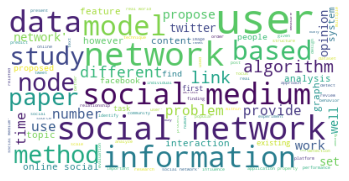

In [ ]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [ ]:
list(cv.vocabulary_.keys())[:10]

['use',
 'social',
 'network',
 'basic',
 'functionality',
 'today',
 'life',
 'use social',
 'social network',
 'network basic']

[Text(0, 0, 'social'),
 Text(0, 0, 'network'),
 Text(0, 0, 'user'),
 Text(0, 0, 'medium'),
 Text(0, 0, 'data'),
 Text(0, 0, 'information'),
 Text(0, 0, 'model'),
 Text(0, 0, 'based'),
 Text(0, 0, 'paper'),
 Text(0, 0, 'link'),
 Text(0, 0, 'study'),
 Text(0, 0, 'node'),
 Text(0, 0, 'problem'),
 Text(0, 0, 'method'),
 Text(0, 0, 'algorithm'),
 Text(0, 0, 'online'),
 Text(0, 0, 'time'),
 Text(0, 0, 'use'),
 Text(0, 0, 'result'),
 Text(0, 0, 'different')]

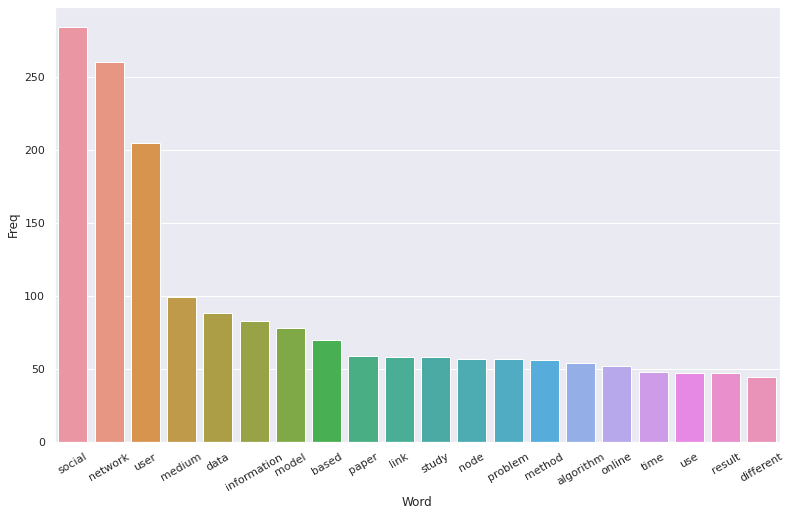

In [ ]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                Bi-gram  Freq
0        social network   125
1         social medium    95
2         online social    31
3            real world    21
4             state art    12
5     social networking    11
6         paper present    10
7           elite sybil     9
8         public health     9
9           word vector     8
10  link recommendation     8
11     network analysis     7
12      medium platform     7
13          data social     7
14  interaction network     7
15    network structure     7
16        cost function     7
17  community structure     7
18         based social     7
19   social interaction     7


[Text(0, 0, 'social network'),
 Text(0, 0, 'social medium'),
 Text(0, 0, 'online social'),
 Text(0, 0, 'real world'),
 Text(0, 0, 'state art'),
 Text(0, 0, 'social networking'),
 Text(0, 0, 'paper present'),
 Text(0, 0, 'elite sybil'),
 Text(0, 0, 'public health'),
 Text(0, 0, 'word vector'),
 Text(0, 0, 'link recommendation'),
 Text(0, 0, 'network analysis'),
 Text(0, 0, 'medium platform'),
 Text(0, 0, 'data social'),
 Text(0, 0, 'interaction network'),
 Text(0, 0, 'network structure'),
 Text(0, 0, 'cost function'),
 Text(0, 0, 'community structure'),
 Text(0, 0, 'based social'),
 Text(0, 0, 'social interaction')]

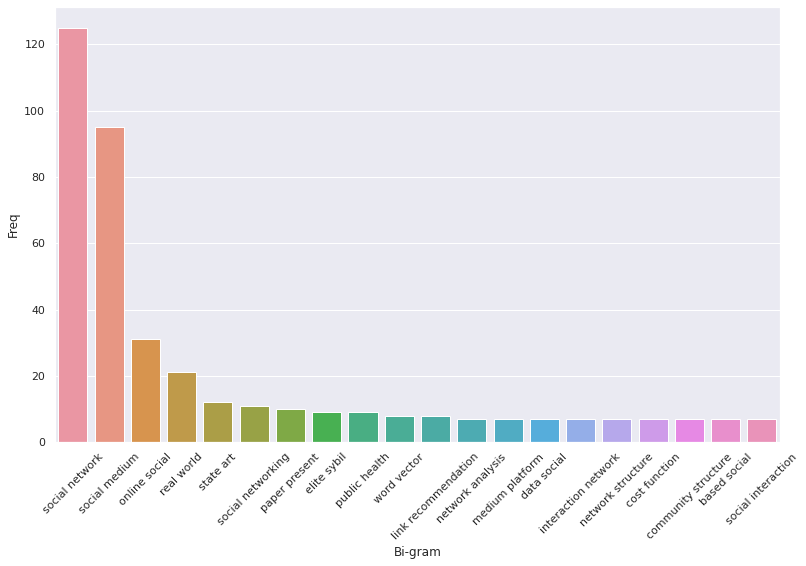

In [ ]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                         Tri-gram  Freq
0           online social network    19
1            online social medium     8
2          social medium platform     7
3              data social medium     7
4            based social network     7
5         social network analysis     6
6           location based social     6
7               use social medium     5
8             social network osns     5
9              social medium user     5
10             social medium data     5
11  exogenous interaction network     5
12              real world social     5
13           world social network     5
14         social networking site     5
15    social medium newsgathering     4
16             social medium text     4
17       personalized word vector     4
18            social network data     4
19        influence whole network     4


[Text(0, 0, 'online social network'),
 Text(0, 0, 'online social medium'),
 Text(0, 0, 'social medium platform'),
 Text(0, 0, 'data social medium'),
 Text(0, 0, 'based social network'),
 Text(0, 0, 'social network analysis'),
 Text(0, 0, 'location based social'),
 Text(0, 0, 'use social medium'),
 Text(0, 0, 'social network osns'),
 Text(0, 0, 'social medium user'),
 Text(0, 0, 'social medium data'),
 Text(0, 0, 'exogenous interaction network'),
 Text(0, 0, 'real world social'),
 Text(0, 0, 'world social network'),
 Text(0, 0, 'social networking site'),
 Text(0, 0, 'social medium newsgathering'),
 Text(0, 0, 'social medium text'),
 Text(0, 0, 'personalized word vector'),
 Text(0, 0, 'social network data'),
 Text(0, 0, 'influence whole network')]

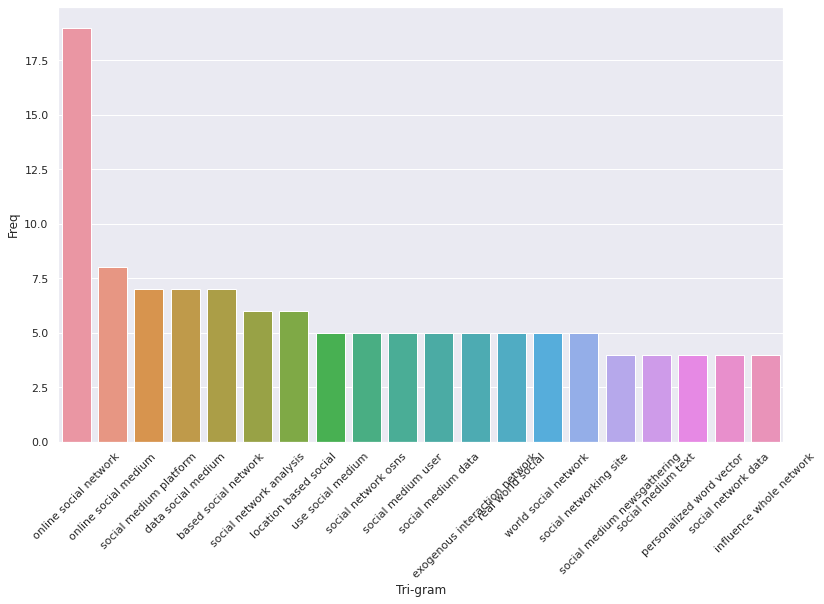

In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
geo tracking help find topic triggered event certain region

Keywords:
triggered event certain 0.283
triggered event 0.283
triggered 0.283
tracking help find 0.283
tracking help 0.283
